<a href="https://colab.research.google.com/github/noviaputri/Book-Recommender-System/blob/main/Book_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

Mengimpor seluruh library yang dibutuhkan

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

# Data Loading

Memuat drive tempat dataset berada

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Melihat isi dari folder data

In [ ]:
os.listdir('/content/gdrive/My Drive/Kaggle/Books Dataset')

['Books.csv', 'Ratings.csv', 'Users.csv']

Membuat variabel untuk menampung masing-masing data yang terdapat di dalam book dataset

In [ ]:
books = pd.read_csv('/content/gdrive/My Drive/Kaggle/Books Dataset/Books.csv')
ratings = pd.read_csv('/content/gdrive/My Drive/Kaggle/Books Dataset/Ratings.csv')
users = pd.read_csv('/content/gdrive/My Drive/Kaggle/Books Dataset/Users.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Univariate Exploratory Data Analysis

Melihat 5 data teratas dari books dataframe

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Melihat info dari book dataframe

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Menghitung banyaknya data buku berdasarkan judul serta melihat nilai unik dari tahun publikasi

In [ ]:
print('Banyak data buku berdasarkan judul: ', len(books['Book-Title'].unique()))
print('Tahun publikasi: ', books['Year-Of-Publication'].unique())

Banyak data buku berdasarkan judul:  242135
Tahun publikasi:  [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911'

Melihat 5 data teratas pada ratings dataframe

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Melihat informasi dari data ratings

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Menghitung banyaknya data rating berdasarkan user dan data rating berdasarkan ISBN buku. Lalu menampilkan nilai unik dari rating

In [ ]:
print('Banyak data rating berdasarkan user: ', len(ratings['User-ID'].unique()))
print('Banyak data rating berdasarkan ISBN buku: ', len(ratings['ISBN'].unique()))
print('Nilai rating: ', ratings['Book-Rating'].unique())

Banyak data rating berdasarkan user:  105283
Banyak data rating berdasarkan ISBN buku:  340556
Nilai rating:  [ 0  5  3  6  8  7 10  9  4  1  2]


Menampilkan 5 data teratas untuk data users

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


Menampilkan informasi dari data users

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Menghitung banyaknya lokasi unik pada data user dan banyaknya user id unik. Lalu menampilkan nilai unik dari umur user.

In [ ]:
print('Banyak lokasi pada data user: ', len(users['Location'].unique()))
print('Banyak user-id: ', len(users['User-ID'].unique()))
print('Variasi umur user: ', users['Age'].unique())

Banyak lokasi pada data user:  57339
Banyak user-id:  278858
Variasi umur user:  [ nan  18.  17.  61.  26.  14.  25.  19.  46.  55.  32.  24.  20.  34.
  23.  51.  31.  21.  44.  30.  57.  43.  37.  41.  54.  42.  50.  39.
  53.  47.  36.  28.  35.  13.  58.  49.  38.  45.  62.  63.  27.  33.
  29.  66.  40.  15.  60.   0.  79.  22.  16.  65.  59.  48.  72.  56.
  67.   1.  80.  52.  69.  71.  73.  78.   9.  64. 103. 104.  12.  74.
  75. 231.   3.  76.  83.  68. 119.  11.  77.   2.  70.  93.   8.   7.
   4.  81. 114. 230. 239.  10.   5. 148. 151.   6. 101. 201.  96.  84.
  82.  90. 123. 244. 133.  91. 128.  94.  85. 141. 110.  97. 219.  86.
 124.  92. 175. 172. 209. 212. 237.  87. 162. 100. 156. 136.  95.  89.
 106.  99. 108. 210.  88. 199. 147. 168. 132. 159. 186. 152. 102. 116.
 200. 115. 226. 137. 207. 229. 138. 109. 105. 228. 183. 204.  98. 223.
 113. 208. 107. 157. 111. 146. 118. 220. 143. 140. 189. 127.]


Membuat histogram berdasarkan umur user

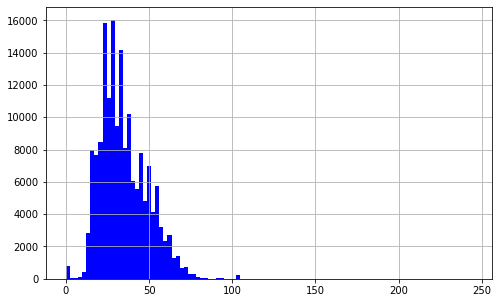

In [ ]:
plt.figure(figsize=(8,5))
users.Age.hist(bins=100, color='blue')

Membuat histogram berdasarkan data rating

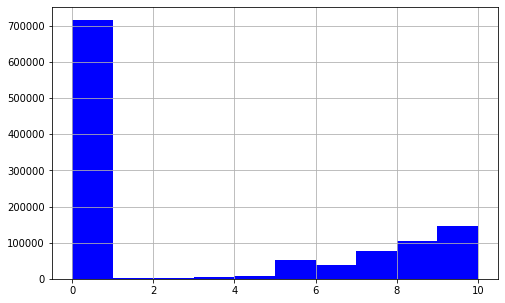

In [ ]:
plt.figure(figsize=(8,5))
ratings['Book-Rating'].hist(bins=10, color='blue')

# Data Preprocessing

Menghapus kolom yang tidak diperlukan pada data books

In [ ]:
books.drop(['Image-URL-S', 'Image-URL-M',	'Image-URL-L'], axis=1, inplace=True)
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


Menggabungkan seluruh ISBN pada data books dan ratings lalu mengurutkan dan menghapus data yang sama. Hal ini dilakukan untuk melihat jumlah seluruh data buku berdasarkan ISBN

In [ ]:
book_all = np.concatenate((
    books["ISBN"].unique(),
    ratings["ISBN"].unique()
))
 
book_all = np.sort(np.unique(book_all))
 
print('Jumlah seluruh data buku berdasarkan Book ID (ISBN): ', len(book_all))

Jumlah seluruh data buku berdasarkan Book ID (ISBN):  341765


Menggabungkan seluruh User-ID pada data ratings dan users lalu mengurutkan dan menghapus data yang sama. Hal ini dilakukan untuk melihat jumlah seluruh data user berdasarkan User-ID

In [ ]:
user_all = np.concatenate((
    ratings["User-ID"].unique(),
    users["User-ID"].unique()
))
 
user_all = np.sort(np.unique(user_all))
 
print('Jumlah seluruh data pengguna berdasarkan User ID: ', len(user_all))

Jumlah seluruh data pengguna berdasarkan User ID:  278858


Menggabungkan seluruh data pada data ratings, users, dan books menggunakan fungsi merge

In [ ]:
all_data = pd.merge(ratings, users, on='User-ID', how='left')
all_data = pd.merge(books, all_data, on='ISBN', how='left')
all_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada",NaN
...,...,...,...,...,...,...,...,...,...
1032340,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),276463.0,7.0,"providence, rhode island, usa",26.0
1032341,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,276579.0,4.0,"orem, utah, usa",12.0
1032342,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,276680.0,0.0,"hopewell junction, new york, usa",55.0
1032343,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,276680.0,0.0,"hopewell junction, new york, usa",55.0


# Data Preparation

Mengecek jumlah null pada data

In [ ]:
all_data.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
User-ID                  1209
Book-Rating              1209
Location                 1209
Age                    279044
dtype: int64

Mengatasi kerancuan tahun publikasi pada data. Pertama, lihat data buku dengan tahun publikasi 'DK Publishing Inc'

In [ ]:
all_data.loc[all_data['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
959821,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,169663.0,0.0,"towson, maryland, usa",NaN
959822,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,227771.0,7.0,"savion, n/a, israel",19.0
976112,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,130571.0,0.0,"summerville, south carolina, usa",NaN


Melihat data buku dengan tahun publikasi 'Gallimard'

In [ ]:
all_data.loc[all_data['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
974900,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,137190.0,0.0,"rennes, bretagne, france",31.0


Mengecek judul buku pada indeks ke 209538, 221678, dan 220731

In [ ]:
print("Judul buku indeks ke 209538 : ",all_data['Book-Title'][209538])
print("Judul buku indeks ke 221678 : ",all_data['Book-Title'][221678])
print("Judul buku indeks ke 220731 : ",all_data['Book-Title'][220731])

Judul buku indeks ke 209538 :  Water Music (The Penguin Contemporary American Fiction Series)
Judul buku indeks ke 221678 :  The Moor (Mary Russell Novels (Paperback))
Judul buku indeks ke 220731 :  The Transition of H. P. Lovecraft: The Road to Madness


Mengatur ulang letak data

In [ ]:
all_data.loc[all_data.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
all_data.loc[all_data.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
all_data.loc[all_data.ISBN == '078946697X','Year-Of-Publication'] = 2000
all_data.loc[all_data.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"

all_data.loc[all_data.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
all_data.loc[all_data.ISBN == '0789466953','Book-Author'] = "James Buckley"
all_data.loc[all_data.ISBN == '0789466953','Year-Of-Publication'] = 2000
all_data.loc[all_data.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"

all_data.loc[all_data.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"
all_data.loc[all_data.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
all_data.loc[all_data.ISBN == '2070426769','Year-Of-Publication'] = 2003
all_data.loc[all_data.ISBN == '2070426769','Publisher'] = "Gallimard"

Mengatasi missing value kolom Age pada data Users dengan merubah umur yang lebih dari 80 tahun atau kurang dari 5 tahun menjadi nan. Lalu mengganti nilai nan menjadi nilai mean pada data umur

In [ ]:
all_data.loc[(all_data.Age > 80) | (all_data.Age < 5), 'Age'] = np.nan
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].mean())

Mengubah tipe data pada tahun publikasi menjadi integer. Lalu mengubah tahun yang lebih dari 2004 dan sama dengan 0 menjadi nan

In [ ]:
all_data['Year-Of-Publication'] = all_data['Year-Of-Publication'].astype(int)
all_data.loc[(all_data['Year-Of-Publication'] > 2004) | (all_data['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.nan
all_data.isnull().sum()

ISBN                       0
Book-Title                 0
Book-Author                1
Year-Of-Publication    14238
Publisher                  2
User-ID                 1209
Book-Rating             1209
Location                1209
Age                        0
dtype: int64

Menghapus data null yang terdapat pada all_data

In [ ]:
all_data = all_data.dropna()
all_data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
User-ID                0
Book-Rating            0
Location               0
Age                    0
dtype: int64

Mengubah tipe data yang tidak sesuai

In [ ]:
all_data['Year-Of-Publication'] = all_data['Year-Of-Publication'].astype(int)
all_data['Age'] = all_data['Age'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Mengecek nilai unik pada data tahun publikasi

In [ ]:
all_data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 1925, 1948, 1943,
       1947, 1945, 1923, 1939, 1926, 1938, 1911, 1904, 1949, 1932, 1928,
       1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902, 1924, 1921, 1900,
       1944, 1917, 1901, 1908, 1906, 1935, 1806, 1909, 1378, 1919, 1922,
       1897, 1376])

Mengecek nilai unik pada data umur

In [ ]:
all_data['Age'].unique()

array([18, 37, 49, 30, 36, 29, 60, 27, 71, 40, 53, 65, 46, 47, 26, 56, 39,
       25, 31, 41, 20, 58, 42, 38, 52, 21, 22, 34, 33, 19, 57, 51, 48, 35,
       32, 62, 45, 74, 44, 43, 68, 54, 55, 24, 59, 28, 70, 17, 23, 14, 50,
       16, 61, 15, 66, 67,  9, 72, 64, 13, 75, 76, 69, 73, 63, 77, 79,  7,
       12, 80, 78,  8, 11, 10,  5,  6])

Mengurutkan data berdasarkan ISBN kemudian memasukkannya ke dalam variabel fix_data

In [ ]:
fix_data = all_data.sort_values('ISBN')
fix_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
1014536,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,171118.0,8.0,"toronto, ontario, canada",47
968367,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,86123.0,0.0,"peterborough, ontario, canada",37
968368,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,209516.0,0.0,"felixstowe, suffolk, united kingdom",57
788157,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,196149.0,0.0,"lisburn, northern ireland, united kingdom",29
542225,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,23902.0,6.0,"london, england, united kingdom",37
...,...,...,...,...,...,...,...,...,...
957999,B0001PBXMS,"Love, etc.",Julian Barnes,2001,Knopf,81207.0,0.0,"maia, porto, portugal",20
753101,B0001PIOX4,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,271705.0,0.0,"atlanta, georgia, usa",25
937731,B000234N3A,Fraud,David Rakoff,2001,Doubleday,100906.0,9.0,"seattle, washington, usa",34
670647,B000234N76,Falling Angels,Tracy Chevalier,2001,E P Dutton,264317.0,0.0,"portela de sacavém, loures, portugal",25


Mengecek berapa jumlah fix_data

In [ ]:
len(fix_data.ISBN.unique())

265482

Membuang data duplikat pada variabel ISBN

In [ ]:
fix_data = fix_data.drop_duplicates('ISBN')
fix_data

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
1014536,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,171118.0,8.0,"toronto, ontario, canada",47
968367,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,86123.0,0.0,"peterborough, ontario, canada",37
788157,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,196149.0,0.0,"lisburn, northern ireland, united kingdom",29
542225,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,23902.0,6.0,"london, england, united kingdom",37
859209,0001046934,The Prime of Miss Jean Brodie,Muriel Spark,1999,Trafalgar Square Publishing,206300.0,0.0,"london, england, united kingdom",34
...,...,...,...,...,...,...,...,...,...
957999,B0001PBXMS,"Love, etc.",Julian Barnes,2001,Knopf,81207.0,0.0,"maia, porto, portugal",20
753101,B0001PIOX4,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,271705.0,0.0,"atlanta, georgia, usa",25
937731,B000234N3A,Fraud,David Rakoff,2001,Doubleday,100906.0,9.0,"seattle, washington, usa",34
670647,B000234N76,Falling Angels,Tracy Chevalier,2001,E P Dutton,264317.0,0.0,"portela de sacavém, loures, portugal",25


Mengonversi data series ISBN, Book-Title, dan Book-Author ke dalam bentuk list

In [ ]:
book_id = fix_data['ISBN'].tolist()
book_title = fix_data['Book-Title'].tolist()
book_author = fix_data['Book-Author'].tolist()
 
print(len(book_id))
print(len(book_title))
print(len(book_author))

265482
265482
265482


Membuat dataframe untuk data ISBN, Book-Title, dan Book-Author

In [ ]:
data_new = pd.DataFrame({
    'isbn': book_id,
    'book_title': book_title,
    'book_author': book_author
})
data_new

,isbn,book_title,book_author
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator)
1,0001010565,Mog's Christmas,Judith Kerr
2,0001046713,Twopence to Cross the Mersey,Helen Forrester
3,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot
4,0001046934,The Prime of Miss Jean Brodie,Muriel Spark
...,...,...,...
265477,B0001PBXMS,"Love, etc.",Julian Barnes
265478,B0001PIOX4,Fahrenheit 451,Ray Bradbury
265479,B000234N3A,Fraud,David Rakoff
265480,B000234N76,Falling Angels,Tracy Chevalier


# Modeling Content Based Filtering

Mengambil 20000 data teratas untuk membuat model, karena jika digunakan keseluruhan data akan memakan memori yang banyak

In [ ]:
data = data_new[:20000]
data.sample(5)

,isbn,book_title,book_author
9856,0061084336,Queen of My Heart (Travel Time Romance),Donna Valentino
1203,0020259115,BUSHMAN WHO CAME BACK (Inspector Napoleon Myst...,Arthur Upfield
19774,0140503846,Peepo! (Picture Puffin S.),Janet Ahlberg
1238,0020298919,Untamed Garden and Other Personal Essays,David Rains Wallace
4636,0060197641,A Voyage For Madmen,Peter Nichols


Inisialisasi TfidfVectorizer untuk melakukan perhitungan idf pada data book_author dan mapping array dari fitur index integer ke fitur nama

In [ ]:
tf = TfidfVectorizer()
tf.fit(data['book_author']) 
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1988',
 'aardema',
 'aaron',
 'aarons',
 'ab',
 'abbe',
 'abbey',
 'abbie',
 'abbott',
 'abel',
 'abelar',
 'abelard',
 'abell',
 'abercrombie',
 'abigail',
 'aboulafia',
 'abraham',
 'abrahams',
 'abrahms',
 'abram',
 'abrams',
 'abshire',
 'abu',
 'access',
 'ace',
 'achebe',
 'achtemeier',
 'ackerman',
 'ackley',
 'ackroyd',
 'acton',
 'adair',
 'adam',
 'adamcewicz',
 'adamec',
 'adams',
 'adamson',
 'adcock',
 'adelaide',
 'adele',
 'adeline',
 'adin',
 'adkins',
 'adler',
 'adoff',
 'adolfo',
 'adolphus',
 'adrian',
 'adrianne',
 'adrien',
 'aelion',
 'aellen',
 'aeschylus',
 'aesop',
 'afton',
 'agate',
 'agatha',
 'agee',
 'agel',
 'agnes',
 'agnew',
 'agueros',
 'aguiar',
 'aguilera',
 'ahlberg',
 'ahlgren',
 'ahmed',
 'ahrons',
 'aidan',
 'aidinoff',
 'aiken',
 'aileen',
 'aini',
 'ainley',
 'ainslie',
 'airasian',
 'aird',
 'airth',
 'aitken',
 'akchurin',
 'akerley',
 'akins',
 'akl',
 'al',
 'alain',
 'alan',
 'alane',
 'alanna',
 'alas',
 'alastair',
 'alban',
 'albanes

Melakukan fit dan ditransformasikan ke bentuk matrix pada data book_author

In [ ]:
tfidf_matrix = tf.fit_transform(data['book_author']) 
tfidf_matrix.shape 

(20000, 8733)

Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Membuat dataframe untuk melihat tf-idf matrix. Pada dataframe tersebut kolom diisi dengan nama author dan baris diisi dengan judul buku

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data["book_title"]
).sample(22, axis=1).sample(10, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,valette,peggy,robins,beauchamp,kraftsow,haien,pene,hudson,fineberg,gaines,daiker,jules,kyung,edwin,arendt,kimbriel,hickerson,else,yasu,mcbride,smedes,bruce
book_title,,,,,,,,,,,,,,,,,,,,,,
"The centering book: Awareness activities for children, parents, and teachers (Transpersonal books)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The Bad Beginning (A Series of Unfortunate Events, Book 1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rip-Roaring Russell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Almost Like Being in Love : A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Two of a Kind #09: Calling All Boys (Two of a Kind, 9)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All the Places to Love,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Manager's Factomatic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Against gravity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Our Religions : The Seven World Religions Introduced by Preeminent Scholars from Each Tradition,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menghitung cosine similarity pada matrix tf-idf

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul buku

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (20000, 20000)


book_title,"The Western Tradition: Study Guide, Semester I",The Complete Idiot's Guide to Martial Arts,Last Chance Saloon,A Window in Time (Harper Monogram),Saving Grace
book_title,,,,,
Biggest Elvis,0.0,0.0,0.0,0.0,0.0
The Search for the Giant Squid,0.0,0.0,0.0,0.0,0.0
The Stanislavski System: The Professional Training of an Actor : Digested from the Teachings of Konstantin S. Stanislavski (Penguin Handbooks),0.0,0.0,0.0,0.0,0.0
Women's Reality: An Emerging Female System in a White Male Society,0.0,0.0,0.0,0.0,0.0
Early American Writing (Penguin Classics),0.0,0.0,0.0,0.0,0.0
Captain Cat (I Can Read Book 1),0.0,0.0,0.0,0.0,0.0
"Drawing Down the Moon: Witches, Druids, Goddess-Worshippers, and Other Pagans in America Today",0.0,0.0,0.0,0.0,0.0
The Complete Idiot's Guide to Awakening Your Spirituality,0.0,0.0,0.0,0.0,0.0
A Zoo in My Luggage,0.0,0.0,0.0,0.0,0.0


Membuat fungsi rekomendasi dengan menggunakan 4 parameter yaitu nama_book, similarity_data, items, dan k.

In [ ]:
def book_recommendations(nama_book, similarity_data=cosine_sim_df, items=data[['book_title', 'book_author']], k=5):
    """
    Rekomendasi Buku berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    nama_book : tipe data string (str)
                Nama Buku (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan buku sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
 
    # mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # dataframe diubah menjadi numpy
    # range(start, stop, step)
    index = similarity_data.loc[:,nama_book].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # drop nama_book agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_book, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Melihat data untuk judul buku "Horrible Harry and the Green Slime"

In [ ]:
data[data.book_title.eq('Horrible Harry and the Green Slime')]

,isbn,book_title,book_author
18892,0140389709,Horrible Harry and the Green Slime,Suzy Kline


Mendapatkan 5 rekomendasi buku yang mirip dengan "Horrible Harry and the Green Slime"

In [ ]:
book_recommendations('Horrible Harry and the Green Slime')

,book_title,book_author
0,Horrible Harry Moves Up to Third Grade (Puffin...,Suzy Kline
1,Horrible Harry in Room 2B (Horrible Harry (Pap...,Suzy Kline
2,Horrible Harry in Room 2B (A Young Puffin),Suzy Kline
3,Horrible Harry and the Drop of Doom (Puffin Ch...,Suzy Kline
4,Horrible Harry and the Dungeon (Puffin Chapter...,Suzy Kline


Menghitung nilai presisi dari sistem yang telah dibuat yaitu dengan membagi jumlah rekomendasi buku yang relevan dengan jumlah keseluruhan buku yang direkomendasikan

In [ ]:
nilai_presisi = 5/5
print("Nilai presisi dari content based filtering adalah", nilai_presisi)

Nilai presisi dari content based filtering adalah 1.0


# Modelling Colaborative Based

Mengambil 20000 data teratas untuk membuat model, karena jika digunakan keseluruhan data akan memakan memori yang banyak

In [ ]:
data_colab = fix_data[:20000]
data_colab.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
948585,0020248717,Way Station (A Collier Nucleus Science Fiction...,Clifford D. Simak,1992,Collier Books,171118.0,8.0,"toronto, ontario, canada",47
802837,0070246335,Gregg Shorthand Dictionary: Miniature Series 9...,John Robert Gregg,1974,Glencoe/Macmillan McGraw Hill,197866.0,0.0,"fairview park, ohio, usa",30
908577,0060008881,"Power of 10: The Once-a-Week, Slow Motion Fitn...",Adam Zickerman,2002,HarperResource,213150.0,7.0,"destrehan, louisiana, usa",37
663430,0027351904,Prayer for a Child,Rachel Field,1968,Simon &amp; Schuster Children's Publishing,36606.0,0.0,"san marcos, california, usa",39
1023879,0062500686,A Passion for This Earth: Exploring a New Part...,Valerie Andrews,1990,Harpercollins,217458.0,9.0,"houston, texas, usa",43


Mengubah User-ID menjadi list tanpa nilai yang sama, lalu melakukan encoding pada list tersebut.

In [ ]:
user_ids = data_colab['User-ID'].unique().tolist()
print('list userID: ', user_ids)
 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [171118.0, 86123.0, 196149.0, 23902.0, 206300.0, 244994.0, 246671.0, 251613.0, 166596.0, 53729.0, 76626.0, 189835.0, 95359.0, 131966.0, 198711.0, 10067.0, 16319.0, 266866.0, 26583.0, 43962.0, 156534.0, 274301.0, 52853.0, 176062.0, 110029.0, 70969.0, 201017.0, 96473.0, 114216.0, 11676.0, 256630.0, 44925.0, 56399.0, 122874.0, 131402.0, 175886.0, 139975.0, 205429.0, 266867.0, 206979.0, 229329.0, 265595.0, 110746.0, 215677.0, 89514.0, 69078.0, 63714.0, 243930.0, 201526.0, 208410.0, 244602.0, 184401.0, 98509.0, 98499.0, 93366.0, 101606.0, 67544.0, 36907.0, 13221.0, 245195.0, 85526.0, 98510.0, 101731.0, 106988.0, 170184.0, 120565.0, 25745.0, 224121.0, 194500.0, 122881.0, 216749.0, 246617.0, 189733.0, 193560.0, 227436.0, 181077.0, 114066.0, 14449.0, 204946.0, 249111.0, 222586.0, 189334.0, 268932.0, 93162.0, 130085.0, 68743.0, 17507.0, 98573.0, 103515.0, 27617.0, 36836.0, 217121.0, 28602.0, 138844.0, 86835.0, 42400.0, 263637.0, 161619.0, 11601.0, 159506.0, 180651.0, 166670.0, 937

Mengubah ISBN menjadi list tanpa nilai yang sama, lalu melakukan proses encoding pada list tersebut.

In [ ]:
book_ids = data_colab['ISBN'].unique().tolist()
print('list ISBN: ', book_ids)
 
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
print('encoded ISBN : ', book_to_book_encoded)

book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}
print('encoded angka ke ISBN: ', book_encoded_to_book)

list ISBN:  ['0000913154', '0001010565', '0001046713', '000104687X', '0001046934', '0001047213', '0001047647', '0001047663', '0001047868', '0001047973', '000104799X', '0001048082', '0001048473', '0001049879', '0001052039', '0001053736', '0001053744', '0001056107', '0001061127', '000123207X', '0001232088', '0001360469', '0001372564', '0001374362', '0001374869', '0001382381', '0001382608', '000160418X', '0001711105', '0001711253', '000171421X', '0001714236', '0001714600', '0001718126', '0001811150', '0001811819', '0001821326', '0001821504', '0001840517', '0001841572', '000184251X', '0001842749', '0001845039', '0001846086', '0001848445', '0001848461', '0001850121', '0001856367', '0001857258', '0001900277', '0001935968', '0001939203', '0001941941', '0001941968', '000194214X', '0001944711', '0001944835', '0001945203', '0001952404', '0001952803', '0001953877', '000195833X', '0001961721', '0001981307', '0001981323', '0001981625', '0002000202', '0002000288', '0002000369', '0002000547', '000200

Mapping User-ID dan ISBN yang telah di encoding ke dataframe user dan book

In [ ]:
data_colab['user'] = data_colab['User-ID'].map(user_to_user_encoded)
data_colab['book'] = data_colab['ISBN'].map(book_to_book_encoded)
data_colab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age,user,book
1014536,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,171118.0,8.0,"toronto, ontario, canada",47,0,0
968367,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,86123.0,0.0,"peterborough, ontario, canada",37,1,1
788157,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,196149.0,0.0,"lisburn, northern ireland, united kingdom",29,2,2
542225,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,23902.0,6.0,"london, england, united kingdom",37,3,3
859209,0001046934,The Prime of Miss Jean Brodie,Muriel Spark,1999,Trafalgar Square Publishing,206300.0,0.0,"london, england, united kingdom",34,4,4
...,...,...,...,...,...,...,...,...,...,...,...
476976,0140566724,Max's Chocolate Chicken (Max and Ruby (Paperba...,Rosemary Wells,2000,Puffin Books,16795.0,5.0,"mechanicsville, maryland, usa",47,801,19995
919650,0140567003,Spot Goes Splash! and Other Stories (Spot Books),Eric Hill,2000,Puffin Books,110029.0,0.0,"norwich, england, united kingdom",27,24,19996
392937,0140568123,Miss Fannie's Hat (Picture Puffins),Jan Karon,2001,Puffin Books,142639.0,10.0,"san jose, california, usa",37,7035,19997
1005375,0140570020,The Pastons: A Family in the Wars of the Roses,Richard Barber,1984,Penguin Books,36836.0,0.0,"raleigh, north carolina, usa",56,90,19998


Mendapatkan jumlah user dan buku. Lalu mengubah nilai rating menjadi float dan mendapatkan nilai minimum dan maksimum dari rating menggunakan fungsi min() dan max(). 

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_book = len(book_encoded_to_book)
print(num_book)
 
data_colab['Book-Rating'] = data_colab['Book-Rating'].values.astype(np.float32)
 
min_rating = min(data_colab['Book-Rating'])
 
max_rating = max(data_colab['Book-Rating'])
 
print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

7037
20000
Number of User: 7037, Number of Book: 20000, Min Rating: 0.0, Max Rating: 10.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Mengacak dataset dengan random_state = 42

In [ ]:
df = data_colab.sample(frac=1, random_state=42)
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age,user,book
846191,0062513362,The Multi-Orgasmic Man: Sexual Secrets Every M...,Mantak Chia,1997,HarperSanFrancisco,147578.0,10.0,"sydney, new south wales, australia",23,4639,10650
336351,0028613430,The Complete Idiot's Guide to Getting Rich (Co...,Larry Waschka,1996,Macmillan Distribution,14638.0,0.0,"roquemaure, languedoc roussillon, france",33,1274,2041
548721,0061012491,Rising Phoenix,Kyle Mills,1998,HarperTorch,133935.0,0.0,"north arlington, new jersey, usa",28,4006,8668
581957,002008823X,FRANCHISE AFFAIR,Josephine Tey,1988,Scribner Paper Fiction,75173.0,8.0,"los angeles, california, usa",38,726,1114
698869,0131283804,Cheiro's Palmistry for All: The Classic of Pal...,Chiero,1988,Fireside Books,40222.0,10.0,"san diego, california, usa",33,3732,13902
...,...,...,...,...,...,...,...,...,...,...,...
293772,0064406423,"Fear: A Novel (The X-Files , No 7)",Les Martin,1996,HarperEntertainment,38660.0,7.0,"ottawa, ontario, canada",40,477,11284
718948,0064671798,Wheelock's Latin (Harpercollins College Outline),Frederic M. Wheelock,1995,Harpercollins,43678.0,0.0,"la jolla, california, usa",37,4734,11964
134319,0060504080,Small Wonder : Essays,Barbara Kingsolver,2003,Perennial,21252.0,0.0,"duluth, minnesota, usa",28,2794,5390
890631,0006742955,Red Shift,Alan Garner,1999,Collins,131402.0,0.0,"governors bay, canterbury, new zealand",37,34,860


Membuat variabel x untuk mencocokkan data user dan book menjadi satu value. Lalu membuat variabel y untuk membuat rating serta dinormalisasi dengan nilai min-max. Dan juga membagi data menjadi 80% data latih dan 20% data uji.

In [ ]:
x = df[['user', 'book']].values
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 4639 10650]
 [ 1274  2041]
 [ 4006  8668]
 ...
 [ 2794  5390]
 [   34   860]
 [  842 15795]] [1. 0. 0. ... 0. 0. 0.]


Membuat kelas untuk sistem rekomendasi yang berisi fungsi dengan 3 parameter yaitu num_users, num_book, dan embedding_size.

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # insialisasi fungsi
  def __init__(self, num_users, num_book, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_book = num_book
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.book_embedding = layers.Embedding( # layer embeddings book
        num_book,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.book_bias = layers.Embedding(num_book, 1) # layer embedding book bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
    book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
 
    x = dot_user_book + user_bias + book_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

Inisialisasi model dengan memasukkan nilai ke parameter yang ada. Lalu mengcompile model.

In [ ]:
model = RecommenderNet(num_users, num_book, 50) 
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Melakukan proses training model dengan 100 kali epochs

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
2000/2000 [==============================] - 24s 12ms/step - loss: 0.6804 - root_mean_squared_error: 0.4307 - val_loss: 0.6673 - val_root_mean_squared_error: 0.4249
Epoch 2/100
2000/2000 [==============================] - 23s 12ms/step - loss: 0.5974 - root_mean_squared_error: 0.3814 - val_loss: 0.6497 - val_root_mean_squared_error: 0.4141
Epoch 3/100
2000/2000 [==============================] - 24s 12ms/step - loss: 0.5525 - root_mean_squared_error: 0.3562 - val_loss: 0.6377 - val_root_mean_squared_error: 0.4072
Epoch 4/100
2000/2000 [==============================] - 24s 12ms/step - loss: 0.5265 - root_mean_squared_error: 0.3405 - val_loss: 0.6257 - val_root_mean_squared_error: 0.4003
Epoch 5/100
2000/2000 [==============================] - 23s 12ms/step - loss: 0.5059 - root_mean_squared_error: 0.3283 - val_loss: 0.6158 - val_root_mean_squared_error: 0.3948
Epoch 6/100
2000/2000 [==============================] - 23s 12ms/step - loss: 0.4869 - root_mean_squared_error: 0.

Plotting hasil training untuk melihat grafik nilai loss dan rmse dari proses training maupun validasi.

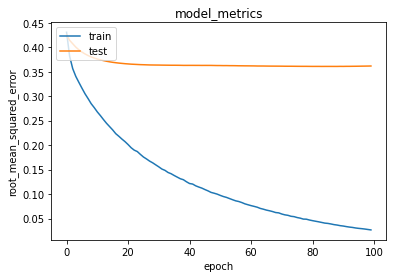

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Inisialisasi data buku dan rating, lalu mengubah nama kolom pada data book_df untuk memudahkan proses pemanggilan variabel. Selanjutnya mengambil sample user untuk direkomendasikan buku. Lalu mendapatkan list buku yang belum pernah dibaca oleh user yang akan direkomendasikan.

In [ ]:
book_df = data_colab
rating_df = data_colab
book_df = book_df.rename(columns={'Book-Title':'book_title', 'Book-Author':'book_author' })
 
user_id = rating_df["User-ID"].sample(1).iloc[0]
book_read_by_user = rating_df[rating_df["User-ID"]== user_id]
 
# operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
book_not_read = book_df[~book_df['ISBN'].isin(book_read_by_user["ISBN"].values)]['ISBN'] 
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

Mendapatkan rekomendasi buku untuk user-id yang sudah ditentukan sebelumnya. Rekomendasi berupa dengan rating tinggi dari user dan top 10 buku yang direkomendasikan.

In [ ]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(book_not_read[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Book with high ratings from user')
print('----' * 8)
 
top_book_user = (
    book_read_by_user.sort_values(
        by = 'Book-Rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
book_df_rows = book_df[book_df['ISBN'].isin(top_book_user)]
for row in book_df_rows.itertuples():
    print(row.book_title, ':', row.book_author)
 
print('----' * 8)
print('Top 10 book recommendation')
print('----' * 8)
 
recommended_book = book_df[book_df['ISBN'].isin(recommended_book_ids)]
for row in recommended_book.itertuples():
    print(row.book_title, ':', row.book_author)

Showing recommendations for users: 123625.0
Book with high ratings from user
--------------------------------
The Witch of Lagg : Ann Pilling
Hollywood and Levine (Perennial Library, P 674) : Andrew Bergman
Magic Touch : Christina Hamlett
Neanderthal : John Darnton
Monster man : Glyn Parry
--------------------------------
Top 10 book recommendation
--------------------------------
An ABC of Enlightenment: A Spiritual Dictionary for the Here and Now : Osho
Frommer's Ireland's Best-Loved Driving Tours : Susan  Poole
Finding Moon : Tony Hillerman
The Dragon's Robe : Deborah Nourse Lattimore
Arthur's Back to School Day (I Can Read Book 2) : Lillian Hoban
The First Circle : Aleksandr Solzhenitsyn
Buffalo Bill and the Pony Express (I Can Read Book 3) : Eleanor Coerr
Fables and folktales (+ 10 vocabulary booster, level A) : William Kottmeyer
Most Beautiful House in the World : Witold Rybczynski
Pigs Aplenty, Pigs Galore! (Picture Puffin S.) : David M. McPhail
